In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import csv
from tqdm import tqdm

csv_path = '/media/patrick/WD-PBrand/coco/train.csv'
anchors_path = '/media/patrick/WD-PBrand/coco/coco_anchors.txt'

In [64]:
def read_csv_file(filename):

    filenames = []
    rois = []
    classes = []
    with open(filename) as csvfile:
        i=['filename', 'rois', 'classes']
        csvdata = csv.DictReader(csvfile, fieldnames=i)
        for row in csvdata:
            filenames.append(row['filename'])
            rois.append(row['rois'])
            classes.append(row['classes'])

    return filenames, rois, classes

def read_labels(filepath, delim):

    classes, names, colors = [], [], []
    with open(filepath,'r') as file:
        lines = file.read().splitlines()
        for line in lines:
            cls, name, color = line.split(delim)
            classes.append(int(cls))
            names.append(name)
            colors.append(eval(color))

    return classes, names, colors

In [65]:
fs,rs,cs = read_csv_file(csv_path)
important_classes, names, colors = read_labels('./80_labels.txt', ';')

In [244]:
index = 2

f = fs[index]
r = eval(rs[index])
c = eval(cs[index])

In [245]:
img = cv2.imread(f)
#img = img[:,:,::-1]

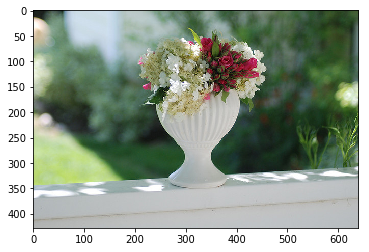

In [246]:
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [247]:
H,W,_ = img.shape
print('Width: {}\nHeight: {}'.format(W,H))
ID = int(c[0])

Width: 640
Height: 428


In [248]:
print('Regions of Interest: {}'.format(r))
print('Class: {}'.format(ID))

Regions of Interest: [['0.519219', '0.451121', '0.398250', '0.757290'], ['0.501188', '0.592138', '0.260000', '0.456192']]
Class: 58


In [249]:
x,y,w,h = [float(y) for y in r[0]]

print('Normalized:')
print('X: {}  Y: {} \nW: {}  H: {}\n'.format(x,y,w,h))

x = int(x * W)
y = int(h * H)
w = int(w * W)
h = int(h * H)

bottom_left = (int(x-0.5*w), int(y-0.5*h))
top_right = (int(x+0.5*w), int(y+0.5*h))
print('Formatted:')
print('X: {}  Y: {} \nW: {}  H: {}'.format(x,y,w,h))

Normalized:
X: 0.519219  Y: 0.451121 
W: 0.39825  H: 0.75729

Formatted:
X: 332  Y: 324 
W: 254  H: 324


In [250]:
#cv2.rectangle(img, top_left, bottom_right, colors[ID], 4)					
#font = cv2.FONT_HERSHEY_SIMPLEX
text = names[ID] #+ ' %.2f'%class_prob
#img = cv2.putText(img, text, (top_left[0], top_left[1]-8), font, 0.7, colors[ID], 2, cv2.LINE_AA)

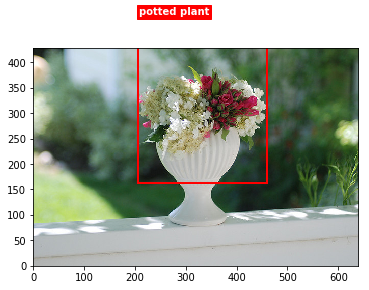

In [256]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
fig,ax = plt.subplots(1)

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = image[::-1,:]

ax.imshow(image, origin='lower')
rect = patches.Rectangle(bottom_left,w,h,linewidth=2,edgecolor='r',facecolor='none')

font = FontProperties()
font.set_family('sans-serif')
font.set_weight('bold')
font.set_size(10)
ax.text(bottom_left[0]+2, top_right[1]+8, text, color='w', fontproperties=font,
        bbox=dict(facecolor='red', edgecolor='red', pad=2))
ax.add_patch(rect)

plt.show()

In [254]:
print(bottom_left)
print(top_right)

(205, 162)
(459, 486)


/media/patrick/WD-PBrand/coco/images/train2014/COCO_train2014_000000000009.jpg


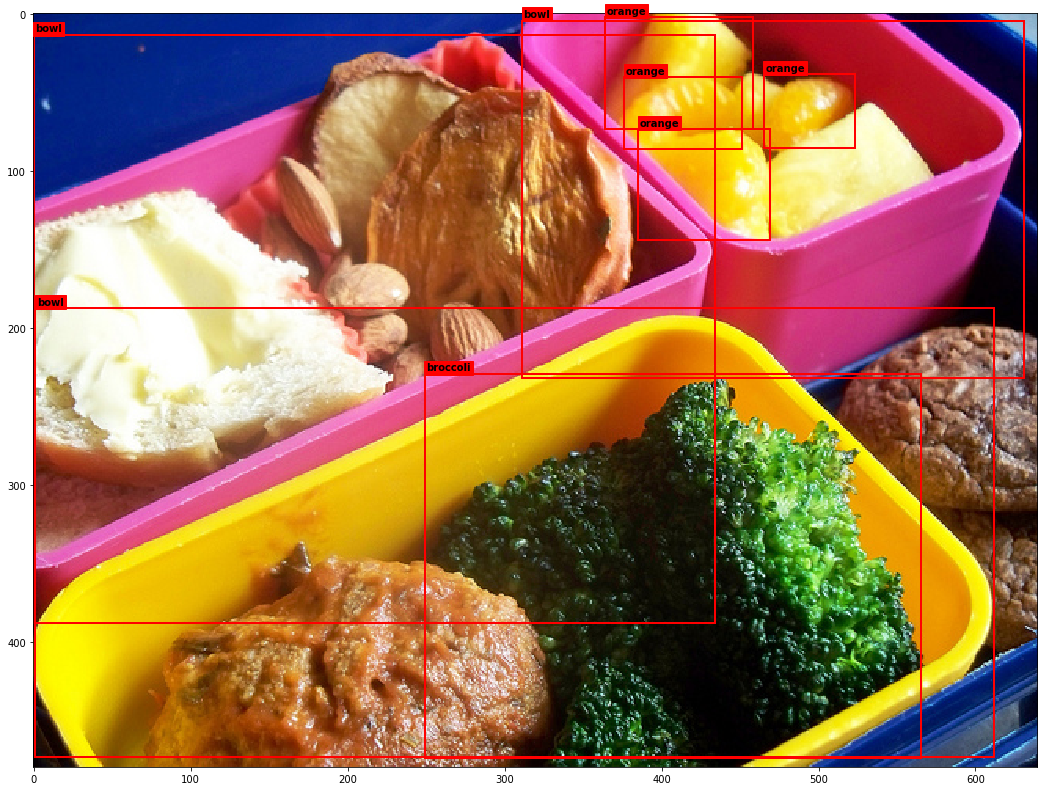

/media/patrick/WD-PBrand/coco/images/train2014/COCO_train2014_000000000025.jpg


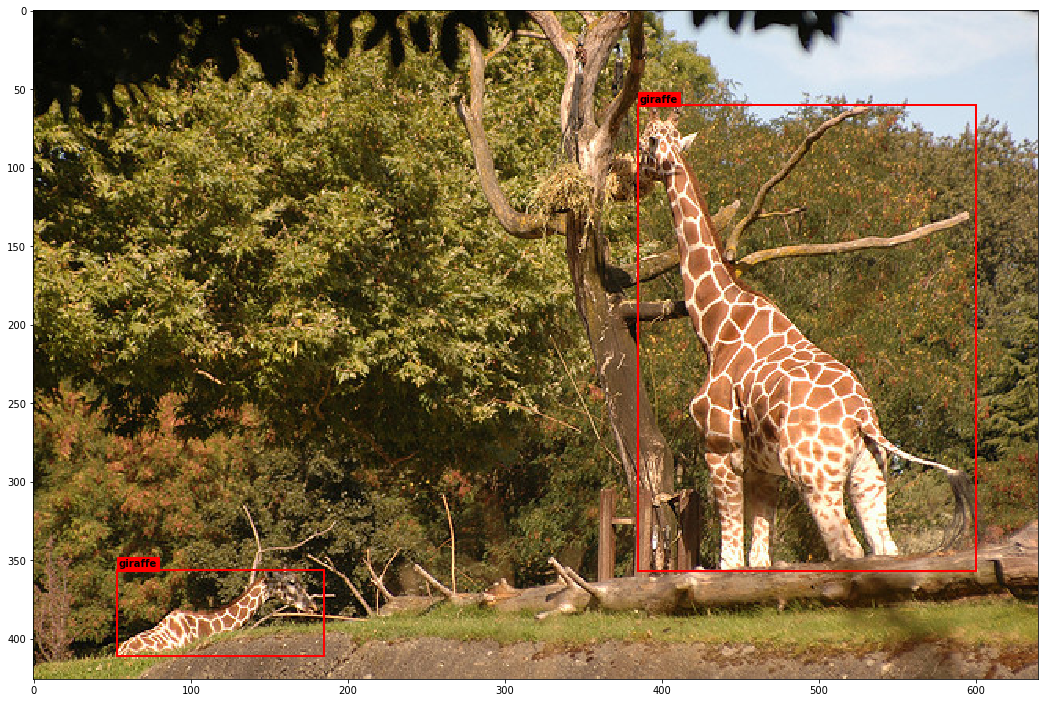

/media/patrick/WD-PBrand/coco/images/train2014/COCO_train2014_000000000030.jpg


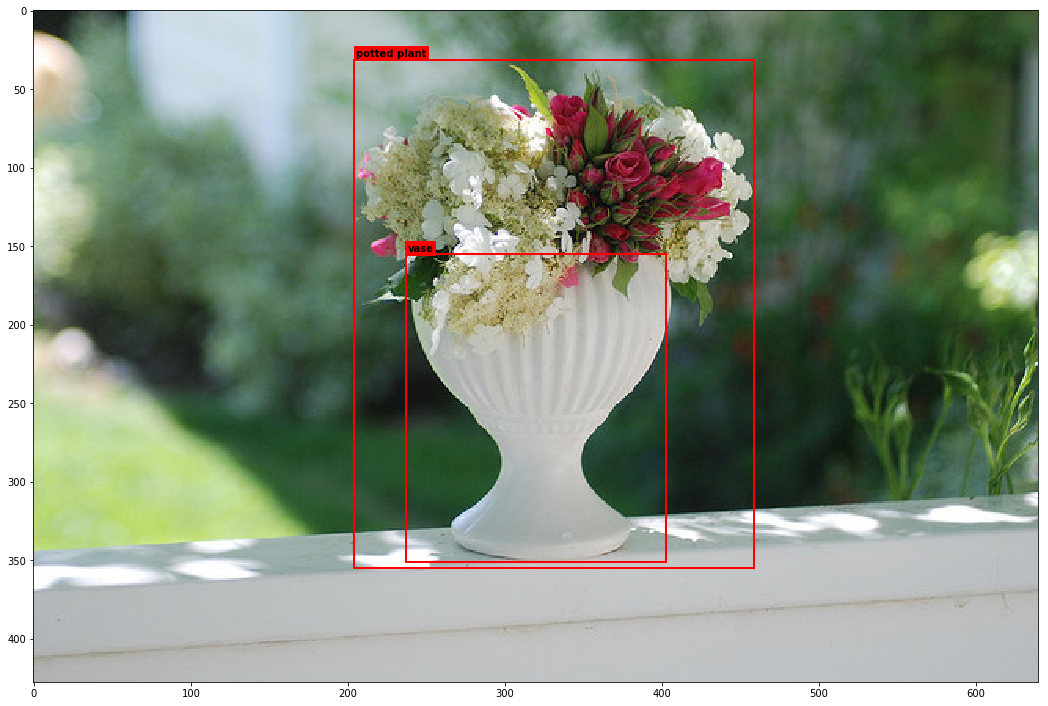

/media/patrick/WD-PBrand/coco/images/train2014/COCO_train2014_000000000034.jpg


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [328]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

csv_path = '/media/patrick/WD-PBrand/coco/train.csv'
#csv_path = '/media/patrick/WD-PBrand/VOC/yolo/data.csv'
fs,rs,cs = read_csv_file(csv_path)

for index in range(0,6):

    f = fs[index]
    r = eval(rs[index])
    c = eval(cs[index])


    print(f)
    img = cv2.imread(f)
    img = cv2.resize(img, (576, 320))
    
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #image = image[::-1,:]

    H,W,_ = img.shape
    #print('Width: {}\nHeight: {}'.format(W,H))

    #print('Regions of Interest: {}'.format(r))
    #print('Class: {}'.format(ID))

    fig,ax = plt.subplots(1,figsize=(18, 16))
    ax.imshow(image)#, origin='lower')
    
    for j in range(len(r)):
        x,y,w,h = [float(y) for y in r[j]]
        ID = int(c[j])

        #print('Normalized:')
        #print('X: {}  Y: {} \nW: {}  H: {}\n'.format(x,y,w,h))

#        x = int(((x + w)/2)*W) #int(x * W)
#        y = int(((y+h)/2)*H) # int(y*H)
#        w = int(w * W)
#        h = int(h * H)

        bottom_left = (int((x-0.5*w)*W), int((y-0.5*h)*H))
        top_right = (int((x+0.5*w)*W),  int((y+0.5*h)*H))
        w =  top_right[0] - bottom_left[0]
        h = top_right[1] - bottom_left[1]
        #print('Formatted:')
        #print('X: {}  Y: {} \nW: {}  H: {}'.format(x,y,w,h))

        text = names[ID]
        
        rect = patches.Rectangle(bottom_left,w,h,linewidth=2,edgecolor='r',facecolor='none')

        font = FontProperties()
        font.set_family('sans-serif')
        font.set_weight('bold')
        font.set_size(10)
        ax.text(bottom_left[0]+1, bottom_left[1]-2, text, color='black', fontproperties=font,
                bbox=dict(facecolor='red', edgecolor='red', pad=2))
        ax.add_patch(rect)
        #ax.plot(x,y, 'r+', markersize=12)

    plt.show()